**Geometric Operations and Other Mathematical Tools with OpenCV**

**Spatial Operations in Image Processing**

Spatial operations use  pixels in a neighborhood to determine the present pixel value. Applications include filtering and sharpening. They are used in many steps in computer vision like segmentation and are a key building block in Artificial Intelligence algorithms.


- Linear Filtering
    - Filtering Noise
    - Gaussian Blur
    - Image Sharpening
- Edges
- Median
- Threshold


In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

**Linear Filtering**

Filtering involves enhancing an image, for example removing the Noise from an image. Noise is caused by a bad camera or bad image compression. The same factors that cause noise may lead to blurry images, we can apply filters to sharpening these images. Convolution is a standard way to Filter an image the filter is called the kernel and different kernels perform different tasks. In addition, Convolution is used for many of the most advanced artificial intelligence algorithms. We simply take the dot product of the kernel and as an equally-sized portion of the image. We then shift the kernel and repeat.


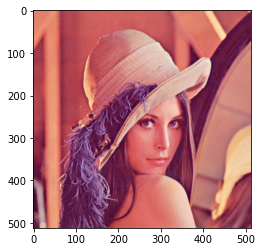

In [3]:
image = cv2.imread("lenna.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

The images we are working with are comprised of RGB values which are values from 0 to 255. Zero means white noise, this makes the image look grainy:


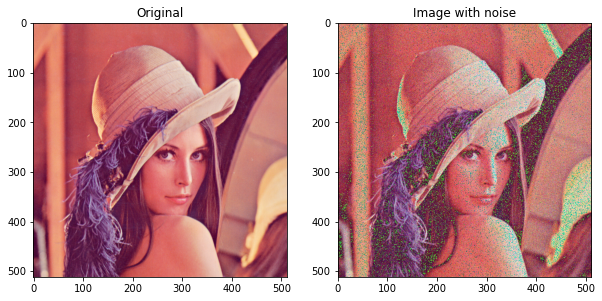

In [5]:
rows, cols, _ = image.shape
Noise = np.random.normal(0,20,(rows, cols,3)).astype(np.uint8)
noisy_image = image + Noise
plot_image(image, noisy_image, title_1="Original", title_2="Image with noise")

When adding noise to an image sometimes the value might be greater than 255, in this case, 256, is subtracted from the value to wrap the number around keeping it between 0 and 255. For example, consider an image with an RGB value of 137 and we add noise with an RGB value of 215 we get an RGB value of 352. We then subtract 256, the total number of possible values between 0 and 255, to get a number between 0 and 255.


**Filtering Noise**

Smoothing filters average out the Pixels within a neighborhood, they are sometimes called low pass filters. For mean filtering, the kernal simply averages out the kernals in a neighborhood.

In [6]:
kernel = np.ones((6,6))/36

The function filter2D performs 2D convolution between the image src and the kernel on each color channel independently. The parameter ddepth has to do with the size of the output image, we will set it to -1 so the input and output are the same size.

In [7]:
filtered_image = cv2.filter2D(src = noisy_image, ddepth = -1, kernel = kernel)

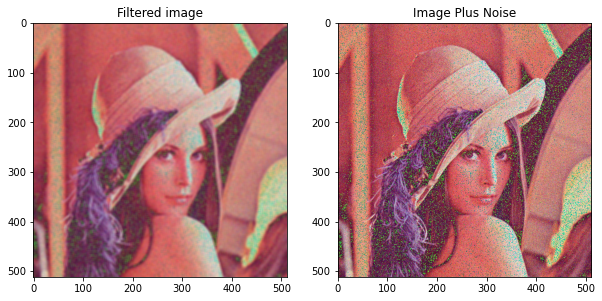

In [8]:
plot_image(filtered_image, noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

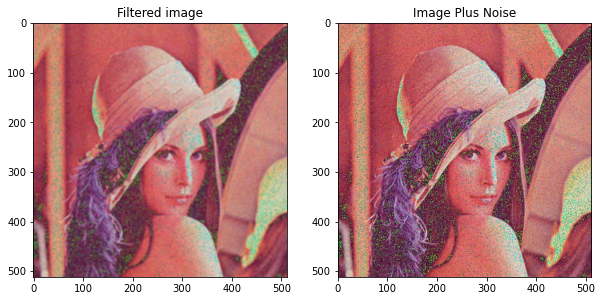

In [9]:
kernel = np.ones((4,4))/16
filtered_image = cv2.filter2D(src = noisy_image, ddepth = -1, kernel = kernel)
plot_image(filtered_image, noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

**Gaussian Blur**

The function GaussianBlur convolves the source image with the specified Gaussian kernel It filters noise but does a better job of preserving the edges. It has the following parameters:
Parameters

src input image; the image can have any number of channels, which are processed independently

ksize: Gaussian kernel size

sigmaX Gaussian kernel standard deviation in the X direction

sigmaY Gaussian kernel standard deviation in the Y direction; if sigmaY is zero, it is set to be equal to sigmaX

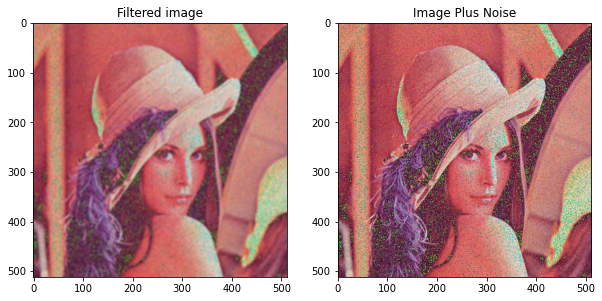

In [14]:
filtered_image = cv2.GaussianBlur(noisy_image, (5,5), sigmaX=4, sigmaY=4)
plot_image(filtered_image, noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

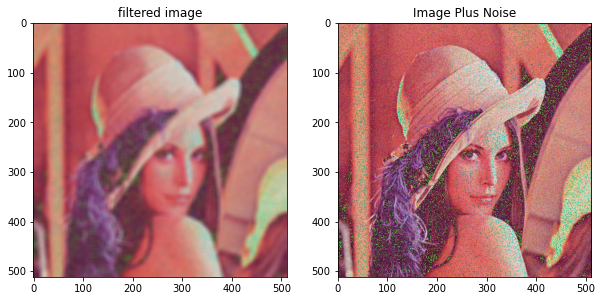

In [15]:
filtered_image = cv2.GaussianBlur(noisy_image,(11,11),sigmaX=10,sigmaY=10)

plot_image(filtered_image , noisy_image,title_1="filtered image",title_2="Image Plus Noise")

**Image Sharpening**

Image Sharpening involves smoothing the image and calculating the derivatives. We can accomplish image sharpening by applying the following Kernel.

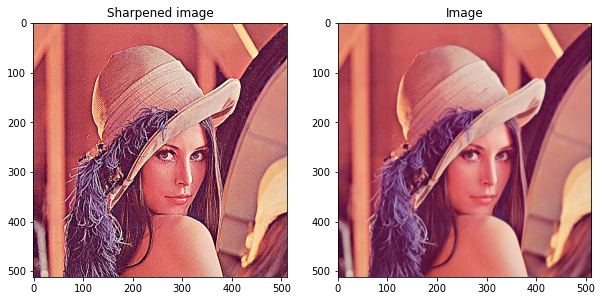

In [17]:
kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
sharpened = cv2.filter2D(image, -1, kernel)
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

**Edges**

Edges are where pixel intensities change. The Gradient of a function outputs the rate of change; we can approximate the gradient of a grayscale image with convolution. There are several methods to approximate the gradient, let’s use the Sobel edge detector. This combines several convolutions and finding the magnitude of the result. Consider the following image:

[[181 201 202 ... 103 102  92]
 [171 198 201 ...  94  96  96]
 [175 195 193 ...  87  96  98]
 ...
 [100  97  97 ... 114 113 117]
 [ 94  97  99 ... 111 112 114]
 [ 96  95  98 ... 113 104 109]]


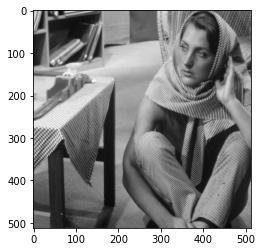

In [18]:
img_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)
print(img_gray)
plt.imshow(img_gray ,cmap='gray')

We smooth the image, this decreases changes that may be caused by noise that would affect the gradient.

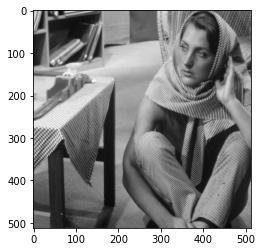

In [20]:
img_gray = cv2.GaussianBlur(img_gray, (3,3), sigmaX=0.1, sigmaY=0.1)
plt.imshow(img_gray, cmap='gray')

We can approximate the derivative in the X or Y direction  using the <code>Sobel</code> function, here are the parameters:


<p><code>src</code>: input image</p>
<p><code>ddepth</code>: output image depth, see combinations; in the case of 8-bit input images it will result in truncated derivatives</p>
<p><code>dx</code>: order of the derivative x</p>
<p><code>dx</code>: order of the derivative y</p>
<p><code>ksize</code> size of the extended Sobel kernel; it must be 1, 3, 5, or 7</p>


dx = 1 represents the derivative in the x-direction.  The function approximates  the derivative by  convolving   the image with the following kernel  


\begin{bmatrix} 
1 & 0 & -1 \\\\\\
2 & 0 & -2 \\\\
1 & 0 & -1 
\end{bmatrix}


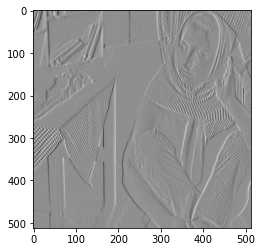

In [25]:
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(src = img_gray, ddepth = ddepth, dx=1, dy=0, ksize=3)
plt.imshow(grad_x,cmap='gray')

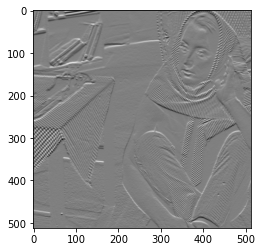

In [26]:
grad_y = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=0, dy=1, ksize=3)
plt.imshow(grad_y,cmap='gray')

We can approximate the gradient by calculating absolute values, and converts the result to 8-bit:

In [28]:
#Converts the values back to a number between 0 and 255
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

Then apply the function 'addWeighted' to calculate the sum of two arrays as follows:

In [29]:
# Add the derivative in the X and Y direction
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

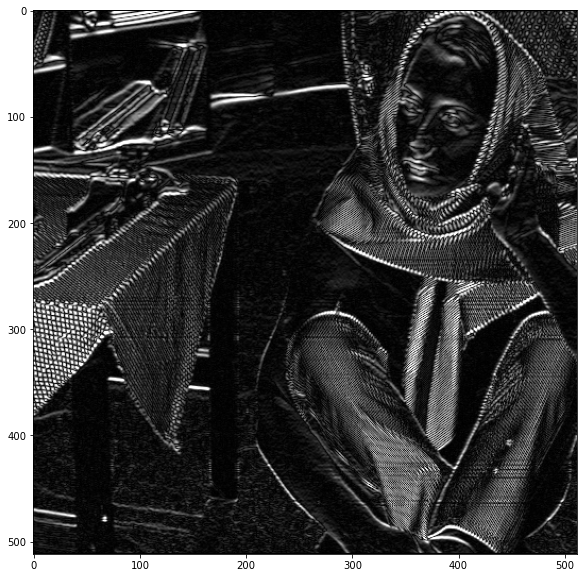

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(grad,cmap='gray')

**Median**

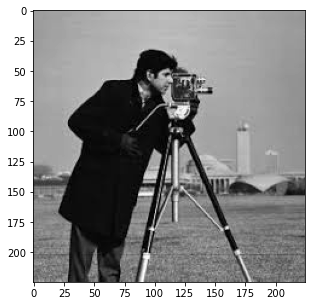

In [32]:
image = cv2.imread("cameraman.jpeg",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5,5))
plt.imshow(image,cmap="gray")

Now let's apply a Median Filter by using the medianBlur function. The parameters for this function are src: The image and ksize: Kernel size

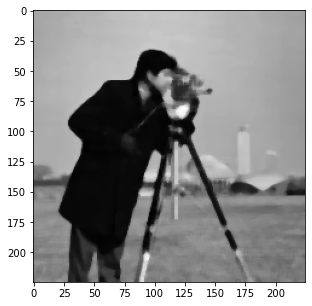

In [35]:
filtered_image = cv2.medianBlur(image, 5)
plt.figure(figsize=(5,5))
plt.imshow(filtered_image, cmap='gray')
plt.show()


We would like to find the cameraman, but median filtering captures some of the background.

## Threshold Function Parameters

`src`: The image to use
`thresh`: The threshold
`maxval`: The maxval to use
`type`: Type of filtering

The threshold function works by looking at each pixel's grayscale value and assigning a value if it is below the threshold and another value if it is above the threshold. In our example the threshold is 0 (black) and the type is binary inverse so if a value is above the threshold the assigned value is 0 (black) and if it is below or equals the threshold the maxval 255 (white) is used. So if the pixel is 0 black it is assigned 255 (white) and if the pixel is not black then it is assigned black which is what THRESH_BINARY_INV tells OpenCV to do. This is how it would work without THRESH_OTSU.

Since we are using THRESH_OTSU it means that OpenCV will decide an optimal threshold. In our example below the threshold, we provide does not get used in the filter OpenCV will use an optimal one.


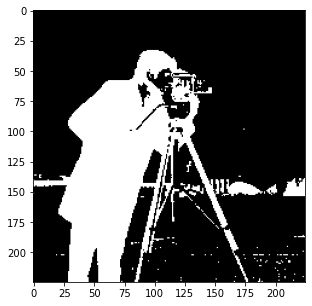

In [38]:
ret, outs = cv2.threshold(src=image, thresh = 0, maxval=255, type=cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)
plt.figure(figsize=(5,5))
plt.imshow(outs, cmap='gray')
plt.show()